In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

In [2]:
def load(file):
    with open(file, "r") as fp:
        js = json.load(fp)
    data = pd.DataFrame(js['benchmarks'])
    data["algo"] = data["name"].apply(lambda x: re.split("[_<>\/]", x)[1])
    data["D"] = data["name"].apply(lambda x: int(re.split("[_<>\/]", x)[2]))
    data["target"] = data["name"].apply(lambda x: int(re.split("[_<>\/]", x)[4]))
    data["x"] = data.target.max() * (data.D - 1) + data.target
    return data
    
intel = load('bits-i7-8550U.json')    
amd = load('bits-ryzen7-2700X.json')

names = {
    'pattern': 'FOR',
    'naive': 'FOR OPT',
    'clever': 'MASKS',
    'pdep': 'BMI2'
}

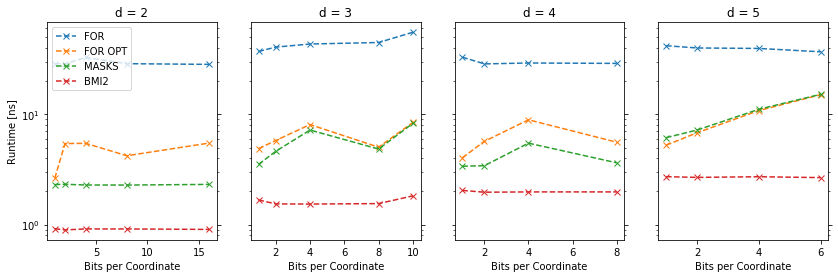

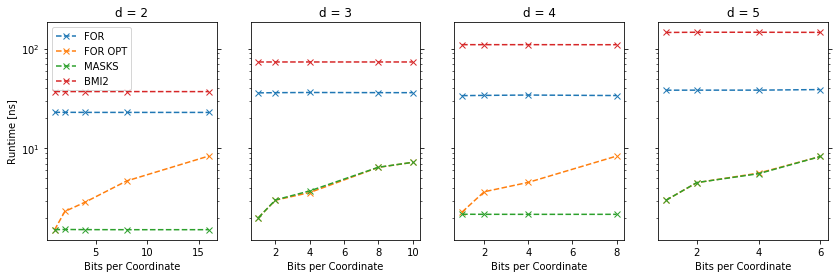

In [3]:
def plot(frame):
    fig, axs = plt.subplots(1,4, figsize=(14,4), sharey=True)

    for d in range(2,6):
        ax = axs[d-2]
        ax.set_title("d = " + str(d))
        ax.set_xlabel("Bits per Coordinate")
        ax.tick_params(axis='y', which='both', right=True)
        data2 = frame[frame.D == d].groupby("algo")
        for alg, name in names.items():
            view = data2.get_group(alg)
            ax.plot(view.target, view.real_time, 'x--', label=name)
    plt.semilogy()       
    axs[0].legend(loc='upper left')
    axs[0].set_ylabel("Runtime [ns]")

plot(intel)
plt.savefig("morton_intel.pdf", bbox_inches='tight')
plot(amd)
plt.savefig("morton_amd.pdf", bbox_inches='tight')